# 预训练Conditional GAN模型生成图像

在 MMgeneration 中调用 Conditional GAN（条件生成对抗网络）预训练模型，生成若干张图像并展示

> 作者：[同济子豪兄](https://space.bilibili.com/1900783)、杨逸飞 2022-4-9

## 进入MMGeneration主目录

In [2]:
import os
os.chdir('mmgeneration')
os.listdir()

['.git',
 '.dev_scripts',
 '.github',
 '.gitignore',
 '.pre-commit-config.yaml',
 '.pylintrc',
 '.readthedocs.yml',
 'CITATION.cff',
 'LICENSE',
 'LICENSES.md',
 'MANIFEST.in',
 'README.md',
 'README_zh-CN.md',
 'apps',
 'configs',
 'demo',
 'docker',
 'docs',
 'mmgen',
 'model-index.yml',
 'requirements.txt',
 'requirements',
 'setup.cfg',
 'setup.py',
 'tests',
 'tools',
 'mmgen.egg-info',
 'outputs',
 'data',
 'checkpoints',
 'work_dirs',
 'tutorials']

## MMGeneration 支持的 Conditional GAN 预训练模型

详细模型信息见：https://github.com/open-mmlab/mmgeneration

| onditional GAN        | 论文      | 文档                                                         | config路径         |
| --------------------- | --------- | ------------------------------------------------------------ | ------------------ |
| SNGAN、Projection GAN | ICLR 2018 | [点我](https://github.com/open-mmlab/mmgeneration/blob/master/configs/sngan_proj/README.md) | configs/sngan_proj |
| SAGAN                 | ICML 2019 | [点我](https://github.com/open-mmlab/mmgeneration/blob/master/configs/sagan/README.md) | configs/sagan      |
| BIGGAN/BIGGAN-DEEP    | ICLR 2019 | [点我](https://github.com/open-mmlab/mmgeneration/blob/master/configs/biggan/README.md) | configs/biggan     |



## 命令行方式调用

In [107]:
!python demo/conditional_demo.py -h

usage: conditional_demo.py [-h] [--save-path SAVE_PATH] [--device DEVICE]
                           [--num-batches NUM_BATCHES]
                           [--samples-per-classes SAMPLES_PER_CLASSES]
                           [--label LABEL [LABEL ...]] [--sample-all-classes]
                           [--sample-model SAMPLE_MODEL]
                           [--sample-cfg SAMPLE_CFG [SAMPLE_CFG ...]]
                           [--padding PADDING] [--nrow NROW]
                           config checkpoint

Generation demo

positional arguments:
  config                test config file path
  checkpoint            checkpoint file

optional arguments:
  -h, --help            show this help message and exit
  --save-path SAVE_PATH
                        path to save uncoditional samples
  --device DEVICE       CUDA device id
  --num-batches NUM_BATCHES
                        Batch size in inference
  --samples-per-classes SAMPLES_PER_CLASSES
                        This argument work to

ImageNet 1000 类别 ID 及 中文释义：https://blog.csdn.net/weixin_41770169/article/details/80482942

248：哈士奇狗

281：虎斑猫

292：老虎

620：笔记本电脑

673：鼠标

850：泰迪熊

In [5]:
!python demo/conditional_demo.py \
    configs/_base_/models/biggan/biggan-deep_512x512_cvt_hugging-face_rgb.py \
    https://download.openmmlab.com/mmgen/biggan/biggan-deep_imagenet1k_512x512_cvt_hugging-face_rgb_20210728_112346-a42585f2.pth \
    --label 248 281 292 620 673 850 \
    --samples-per-classes 6 \
    --save-path outputs/C1_biggan_1.jpg \
    --device cuda:0

/environment/miniconda3/lib/python3.7/site-packages/mmcv/cnn/bricks/conv_module.py:151: UserWarning: Unnecessary conv bias before batch/instance norm
  'Unnecessary conv bias before batch/instance norm')
load checkpoint from http path: https://download.openmmlab.com/mmgen/biggan/biggan-deep_imagenet1k_512x512_cvt_hugging-face_rgb_20210728_112346-a42585f2.pth
2022-04-09 22:05:59,310 - mmgen - INFO - Set `nrows` as number of samples for each class (=6).


## Python API 方式调用

## 导入工具包

In [6]:
# 导入mmcv和mmgeneration
import mmcv
from mmgen.apis import init_model, sample_conditional_model

# 导入numpy和matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

下面以BigGAN为例说明

In [7]:
# 指定config文件路径
config_file = 'configs/_base_/models/biggan/biggan-deep_512x512_cvt_hugging-face_rgb.py'

# 指定预训练模型权重文件路径
checkpoint_file = 'https://download.openmmlab.com/mmgen/biggan/biggan-deep_imagenet1k_512x512_cvt_hugging-face_rgb_20210728_112346-a42585f2.pth'

img_size = 512

注意，`config_file`和`checkpoint_file`需要对应。

## 初始化模型

In [8]:
# 初始化generatvie
model = init_model(config_file, checkpoint_file, device='cuda:0')

/environment/miniconda3/lib/python3.7/site-packages/mmcv/cnn/bricks/conv_module.py:151: UserWarning: Unnecessary conv bias before batch/instance norm
  'Unnecessary conv bias before batch/instance norm')


load checkpoint from http path: https://download.openmmlab.com/mmgen/biggan/biggan-deep_imagenet1k_512x512_cvt_hugging-face_rgb_20210728_112346-a42585f2.pth


## 生成若干张图像

调用`sample_conditional_model`函数，指定生成的图片个数，以及每张图片对应的label


In [ ]:
# 不指定 label，默认为 None
# fake_imgs = sample_conditional_model(model, 64) 

In [12]:
# 生成四张 label 都为0的图像
# n = 2
# fake_imgs = sample_conditional_model(model, 4, label=[0,0,0,0])

In [13]:
# 生成 label 分别为 0、1、2、3 的五张图像
# fake_imgs = sample_conditional_model(model, 4, label=[0, 1, 2, 3]) 

In [9]:
# 生成 n*n 张 label都为248的图像
n = 8
fake_imgs = sample_conditional_model(model, n*n, label=[248]*n*n)

In [10]:
fake_imgs.shape

torch.Size([64, 3, 512, 512])

## 展示单张生成的图像

In [11]:
# 将torch张量转为numpy的array
fake_imgs = fake_imgs.numpy()

In [12]:
fake_imgs.shape

(64, 3, 512, 512)

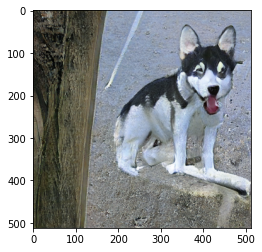

In [20]:
# 选择要展示的图片索引号
index = 4

# 分别抽取RGB三通道图像，归一化为0-255的uint8自然图像
RGB = np.zeros((img_size,img_size,3))
RGB[:,:,0] = fake_imgs[index][2]
RGB[:,:,1] = fake_imgs[index][1]
RGB[:,:,2] = fake_imgs[index][0]

RGB = 255 * (RGB - RGB.min()) / (RGB.max()-RGB.min())
RGB = RGB.astype('uint8')
plt.imshow(RGB)
plt.show()

# n行n列展示生成的图像

In [21]:
def show_fake_img_rgb(index):
    '''输入索引号，展示对应的图像'''

    # 分别抽取RGB三通道图像，归一化为0-255的uint8自然图像
    RGB = np.zeros((img_size,img_size,3))
    RGB[:,:,0] = fake_imgs[index][2]
    RGB[:,:,1] = fake_imgs[index][1]
    RGB[:,:,2] = fake_imgs[index][0]

    RGB = 255 * (RGB - RGB.min()) / (RGB.max()-RGB.min())
    RGB = RGB.astype('uint8')
    return RGB

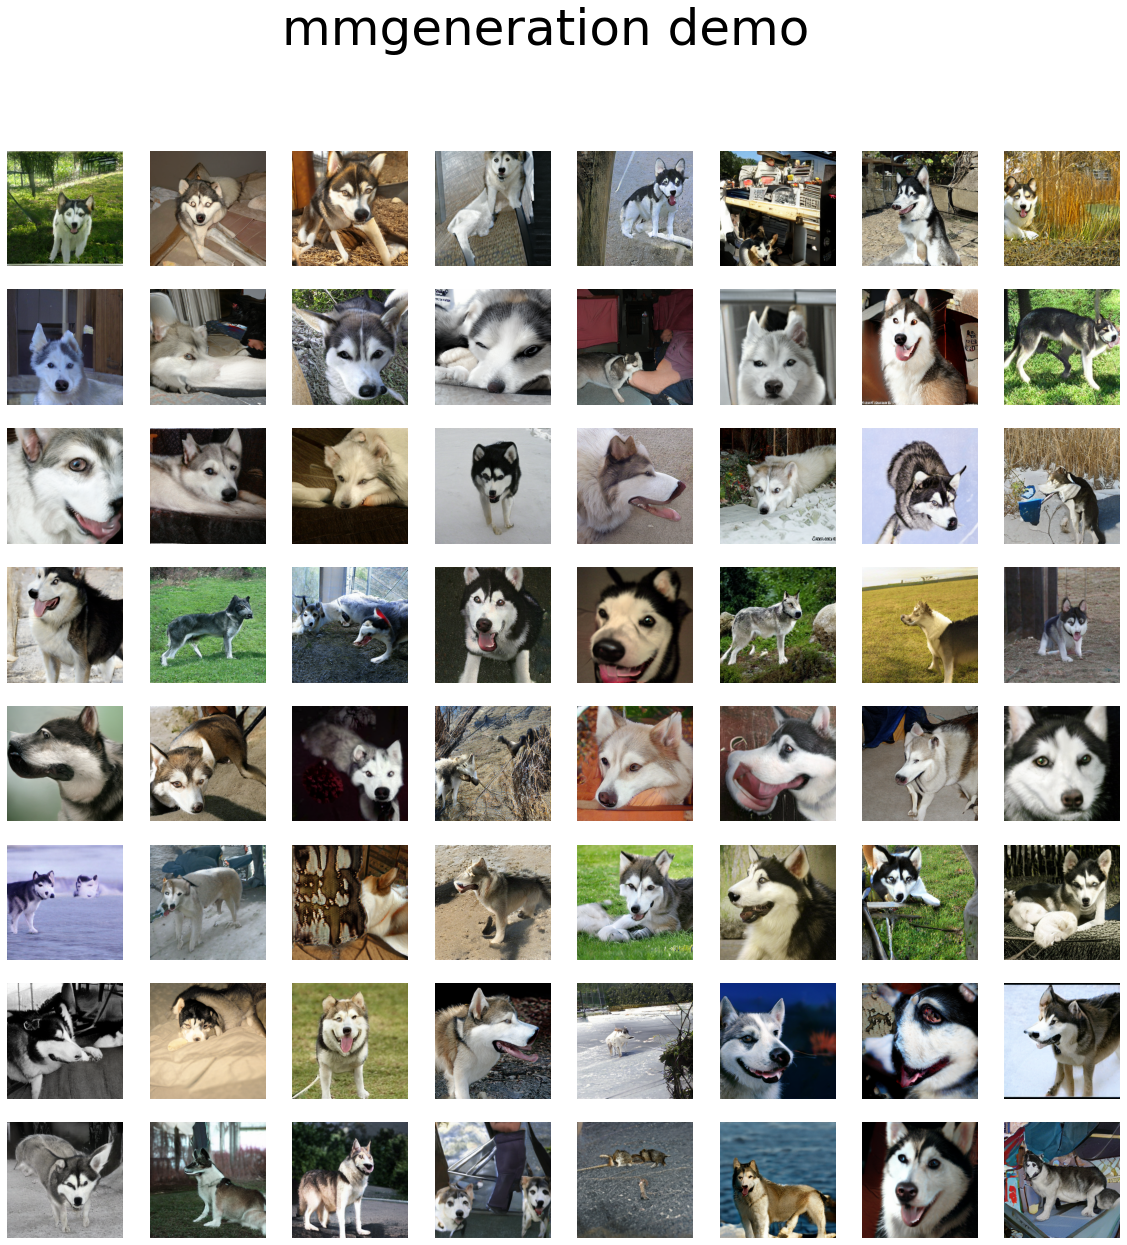

In [22]:
fig, axes = plt.subplots(nrows=n, ncols=n, sharex=True,figsize=(20,20))
for i in range(n*n):
    axes[i//n, i%n].imshow(show_fake_img_rgb(i))
    axes[i//n, i%n].axis('off') # 关闭坐标轴显示
fig.suptitle('mmgeneration demo',fontsize=50)
plt.show()